In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imbalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

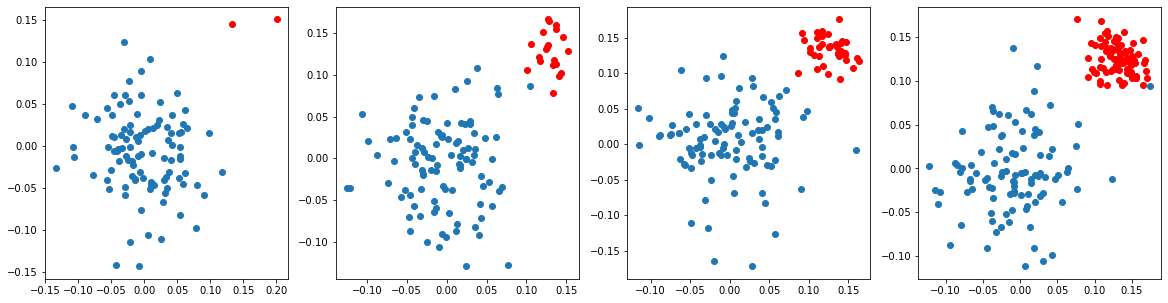

In [18]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

Linearly separable data with support vectors


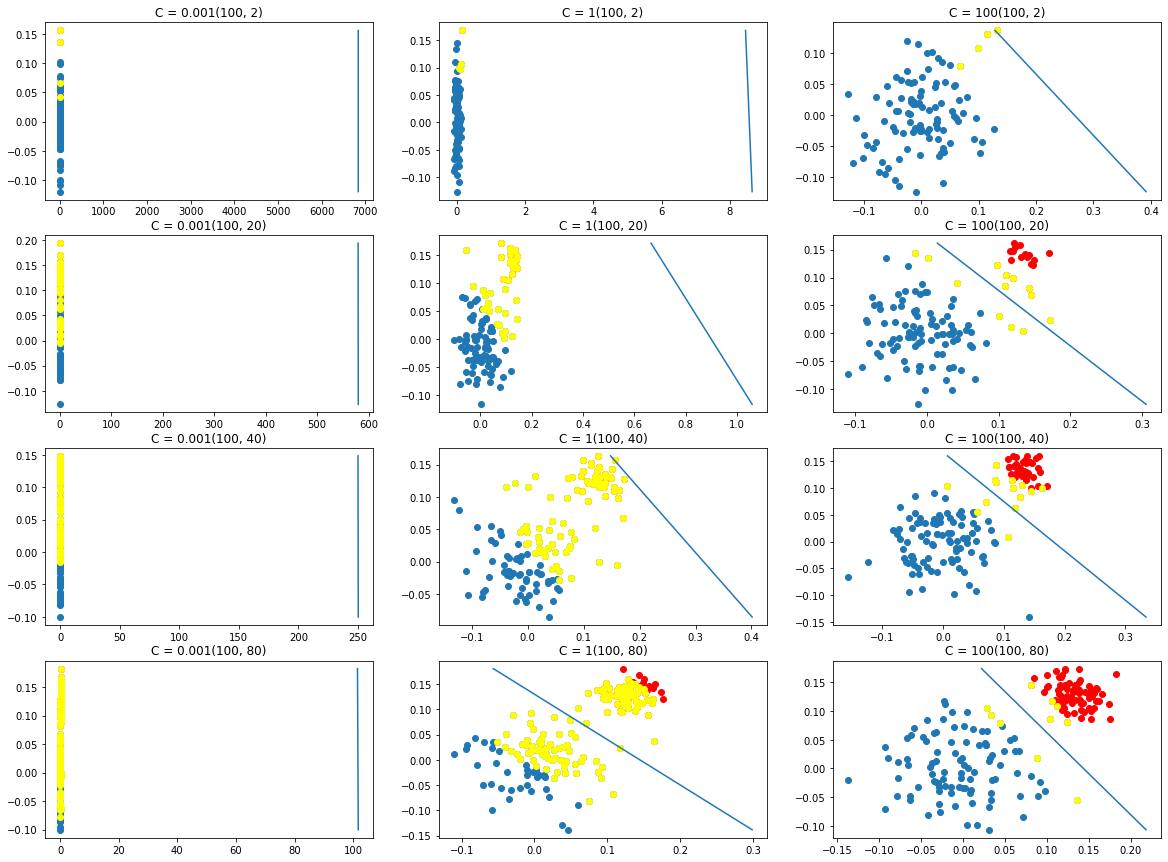

In [33]:
#you can start writing code here.
c = [0.001, 1, 100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,15))
num = 1
for j,i in enumerate(ratios):
    for k in range(len(c)):
        model = SVC(C = c[k], kernel='linear')
        plt.subplot(4, 3, num)
        num += 1
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        model.fit(X, y)
        support_vectors = model.support_vectors_
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.scatter(support_vectors[:,0], support_vectors[:,1], color='yellow')
        plt.title('C = '+ str(c[k])+str(i))
        draw_line(model.coef_[0], model.intercept_, max(X[:,1]), min(X[:,1]))  ##coef,intercept, mi, ma
print("Linearly separable data with support vectors")
plt.show()

# Observation:

* Above is the plot of datasets that are linearly separable and also highly imbalance.
* There are different ratios of imbalance and different hyperparameter C on which separation is done
* When C is 0.001, hyperplane is very far from the datapoints, and it is not at all classifying those points. This is clearly the case of underfitting.
* For the same C value, it can be seen that as ratio of dataset changes, the number of support vectors changes accordingly.
* When C is 1, and dataset is highly imbalance, the hyperplane is very far from classifying the datapoints, similar to the previous C value.
* As and when split ratio increases, the hyperplane comes closer to the datapoints. When split is 100:80, the hyperplane seperates the 2 classes.
* It can be seen that number of support vectors in C=1 is less than the SVs in previous C.
* When C is 100, it can be seen that the hyperplane is already inclined towards the datapoints.
* As split ratio increases, the classification improves and when split is 100:80, the hyperplane perfectly seperates the class points.
* It can be concluded that as value of C and split increases, the hyperplane performance also increases.

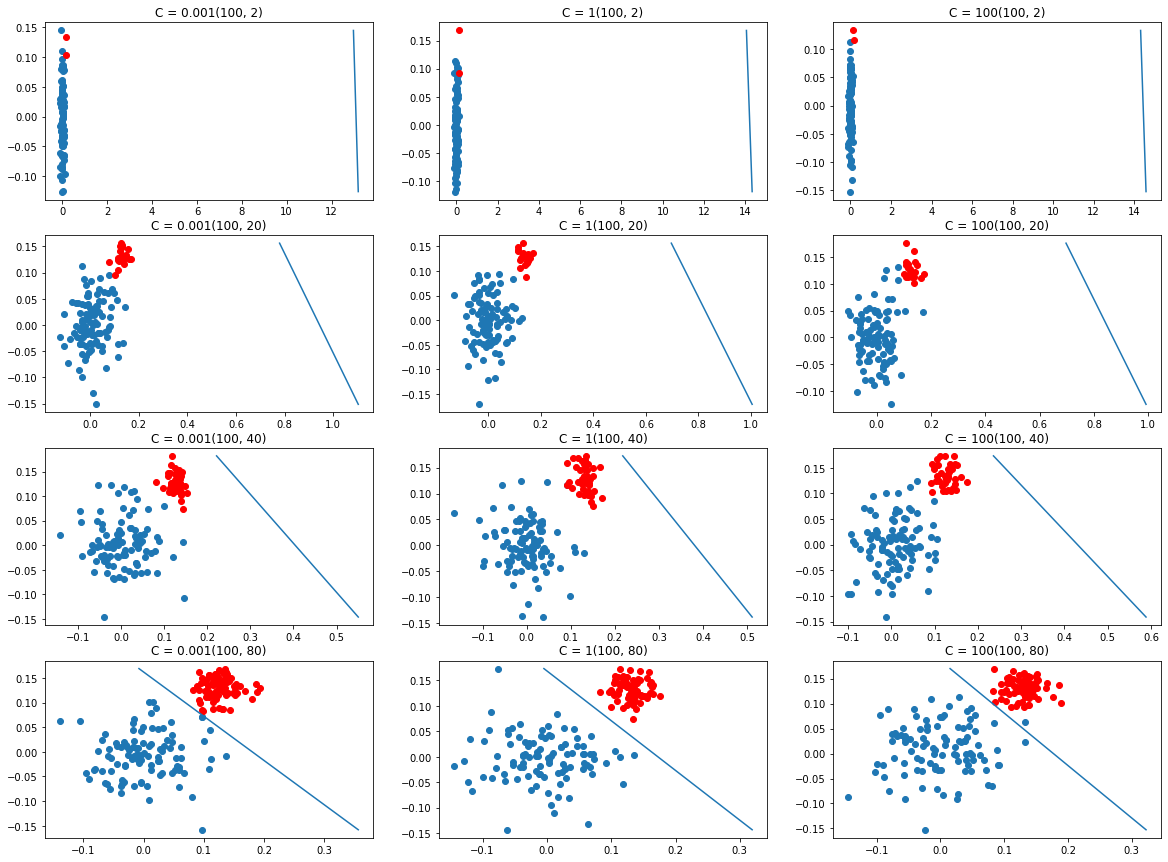

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score
c = [0.001, 1, 100]
num = 1
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,15))
for j,i in enumerate(ratios):
    for k in range(len(c)):
        plt.subplot(4, 3, num)
        num += 1
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        model = LogisticRegression(random_state = 15)
        model.fit(X, y)
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.title('C = '+ str(c[k])+str(i))
        draw_line(model.coef_[0], model.intercept_, max(X[:,1]), min(X[:,1]))  ##coef,intercept, mi, ma
plt.show()

### Observation:

* When C is 0.001 and dataset is highly imbalance, hyperplane is very far from the datapoints, and it is not at all classifying those points. This is clearly the case of underfitting.
* For the same C value, it can be seen that as ratio of dataset changes alongwith the spread which was not the case above, hyperplane gets inclined towards the datapoints.
* For C is 1 and 100, the hyperplane behaves similarly.
* As and when split ratio increases, the hyperplane comes closer to the datapoints. 
* For all C values, when split is 100:80, the hyperplane seperates the 2 classes.
* It can be concluded that for all value of C and as split increases, the hyperplane performance also increases.